<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

*Rogério de Oliveira* 

<br>
<br>

---


Este é um material de apoio para Atividade de Aprofundamento 2. Ele mostra como obter e tratar dados do [Gapminder](https://www.gapminder.org/) e do [WID](https://wid.world/). Você pode empregar uma ou ambas as fontes de dados. 

# Gapminder

![imagem](https://www.gapminder.org/wp-content/themes/gapminder2/images/gapminder-logo.svg)

Essa é uma importante fonte de dados aberta que contêm diversas informações e índices relacionados ao desenvolvimento dos países.

Acesse [aqui](https://www.gapminder.org/data/) para extrair os dados. 

Escolha os dados de seu interesse. Faça o download no formato `.csv` para o local que desejar.

In [30]:
import pandas as pd

income = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income.head()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
0,Afghanistan,674,674,674,674,674,674,674,674,674,674,675,675,675,675,675,675,675,675,675,675,675,679,681,683,685,688,690,692,694,697,699,701,704,707,709,711,713,716,719,...,1910,2080,2120,2100,2070,2060,2060,2030,2070,1920,1950,1990,2040,2070,2100,2140,2170,2210,2250,2300,2340,2390,2440,2490,2540,2590,2650,2710,2760,2820,2880,2940,3000,3070,3130,3200,3270,3340,3410,3480
1,Angola,691,693,697,700,702,705,709,712,716,718,721,724,728,731,735,738,740,743,747,750,754,754,755,756,756,757,757,758,758,759,759,761,761,762,762,762,763,763,764,...,7680,8040,8140,8240,8040,7570,7310,6930,6670,6220,6060,6020,6050,6090,6150,6190,6240,6300,6370,6460,6560,6680,6810,6950,7090,7240,7400,7550,7710,7880,8040,8220,8390,8570,8750,8940,9120,9320,9520,9720
2,Albania,746,746,746,746,746,747,747,747,747,747,747,747,747,747,747,748,748,748,748,748,748,750,751,754,755,757,758,760,761,764,765,767,769,770,773,774,776,777,779,...,11.1k,11.3k,11.4k,11.6k,11.9k,12.3k,12.8k,13.4k,13.7k,13.3k,13.9k,14.5k,15.1k,15.7k,16.3k,16.9k,17.5k,18.1k,18.6k,19.2k,19.7k,20.2k,20.6k,21.1k,21.6k,22k,22.5k,23k,23.5k,24k,24.5k,25k,25.5k,26.1k,26.6k,27.2k,27.8k,28.3k,28.9k,29.6k
3,Andorra,1340,1340,1340,1350,1350,1350,1350,1360,1360,1360,1360,1370,1370,1370,1370,1380,1380,1380,1380,1390,1390,1400,1420,1440,1460,1470,1490,1510,1530,1540,1560,1580,1600,1620,1640,1660,1680,1700,1720,...,46.9k,46.9k,48.9k,50.2k,52.1k,53.9k,55.6k,57.6k,59.6k,61.6k,63.7k,65.9k,68.2k,70.5k,72.9k,75.4k,77.9k,80.4k,82.9k,85.2k,87.4k,89.5k,91.6k,93.6k,95.6k,97.7k,99.7k,102k,104k,106k,108k,111k,113k,116k,118k,121k,123k,126k,128k,131k
4,United Arab Emirates,1120,1120,1120,1130,1130,1140,1140,1150,1150,1150,1160,1160,1170,1170,1180,1180,1180,1190,1190,1200,1200,1210,1210,1220,1220,1220,1230,1230,1240,1240,1250,1250,1260,1260,1270,1270,1280,1280,1290,...,56.1k,57.4k,59.9k,62.4k,65.2k,66.5k,67.2k,67k,67.1k,61.3k,61.3k,61k,60.7k,60.4k,60.2k,59.9k,59.7k,59.7k,59.9k,60.4k,61.1k,62.1k,63.2k,64.4k,65.7k,67.1k,68.5k,69.9k,71.4k,72.9k,74.5k,76.1k,77.7k,79.3k,81k,82.7k,84.5k,86.3k,88.1k,90k


# Preparação dos Dados

Vamos obter aqui dados de escolaridade e emissões de co2 do Brasil. O Gapminder fornece esses dados em conjuntos separados e vamos combinar esses dados para nossa análise.

In [31]:
income_BR = income[ income.country == 'Brazil' ]
income_BR

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049
23,Brazil,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,997,...,15.3k,15.5k,15.8k,15.7k,15.1k,14.4k,14.5k,14.6k,14.7k,14k,14.4k,14.7k,14.9k,15.1k,15.3k,15.6k,15.8k,16.1k,16.3k,16.6k,16.9k,17.3k,17.6k,18k,18.4k,18.8k,19.1k,19.6k,20k,20.4k,20.8k,21.3k,21.7k,22.2k,22.7k,23.1k,23.6k,24.1k,24.6k,25.2k


In [32]:
BR = pd.melt(income_BR, id_vars=['country'])
BR.head()

,country,variable,value
0,Brazil,1799,997
1,Brazil,1800,997
2,Brazil,1801,997
3,Brazil,1802,997
4,Brazil,1803,997


In [33]:
BR = BR.rename(columns={'variable':'year','value':'income'})
BR.head()

,country,year,income
0,Brazil,1799,997
1,Brazil,1800,997
2,Brazil,1801,997
3,Brazil,1802,997
4,Brazil,1803,997


In [34]:
industry = pd.read_csv('https://raw.githubusercontent.com/rodglins/Python/master/desafios/exploracaoDados/industry_percent_of_gdp.csv')
ind_BR = industry[ industry.country == 'Brazil' ]
ind_BR

,country,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
24,Brazil,31.8,36.6,29.8,34.8,32.0,29.9,29.8,29.2,30.7,31.3,32.2,32.7,32.7,33.4,34.8,35.5,35.0,34.1,35.5,36.5,39.6,39.2,41.0,39.5,41.7,41.2,40.2,41.3,39.4,42.3,32.8,31.5,34.0,36.1,34.7,23.4,22.3,22.6,22.1,21.7,23.0,22.6,22.5,23.1,24.3,24.2,23.5,23.1,23.1,21.9,23.3,23.1,22.1,21.2,20.5,19.4,18.4,18.2,18.7,18.4,17.7


In [35]:
ind_BR = pd.melt(ind_BR, id_vars=['country'])
ind_BR = ind_BR.rename(columns={'variable':'year','value':'industry'})
ind_BR.head()

,country,year,industry
0,Brazil,1959,31.8
1,Brazil,1960,36.6
2,Brazil,1961,29.8
3,Brazil,1962,34.8
4,Brazil,1963,32.0


In [36]:
BR = pd.merge(BR,ind_BR,on=['country','year'])
BR.head()

,country,year,income,industry
0,Brazil,1959,3910,31.8
1,Brazil,1960,4150,36.6
2,Brazil,1961,4320,29.8
3,Brazil,1962,4240,34.8
4,Brazil,1963,4280,32.0


In [37]:
display(BR.dtypes)

country      object
year         object
income       object
industry    float64
dtype: object

In [38]:
# BR.year = pd.to_datetime(BR.year, format='%Y',errors='coerce')
# display(BR.dtypes)

In [39]:
BR.income = pd.to_numeric(BR.income,errors='coerce')
display(BR.dtypes)

country      object
year         object
income      float64
industry    float64
dtype: object

# Visualização e Análise dos Dados

In [40]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline 

In [41]:
for c in BR[['industry','income']]:
  BR[c] = BR[c] / BR[c].max()
BR.head()

,country,year,income,industry
0,Brazil,1959,0.394949,0.751773
1,Brazil,1960,0.419192,0.865248
2,Brazil,1961,0.436364,0.704492
3,Brazil,1962,0.428283,0.822695
4,Brazil,1963,0.432323,0.756501


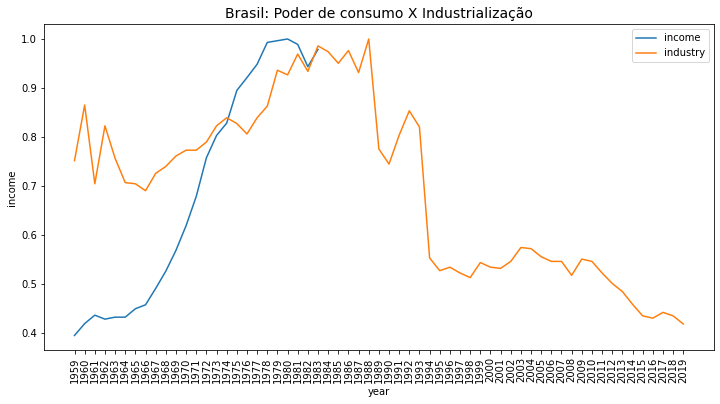

In [42]:
plt.figure(figsize=(12,6))

sns.lineplot(x=BR.year, y=BR.income, label='income')
sns.lineplot(x=BR.year, y=BR.industry, label='industry')

plt.title('Brasil: Poder de consumo X Industrialização', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

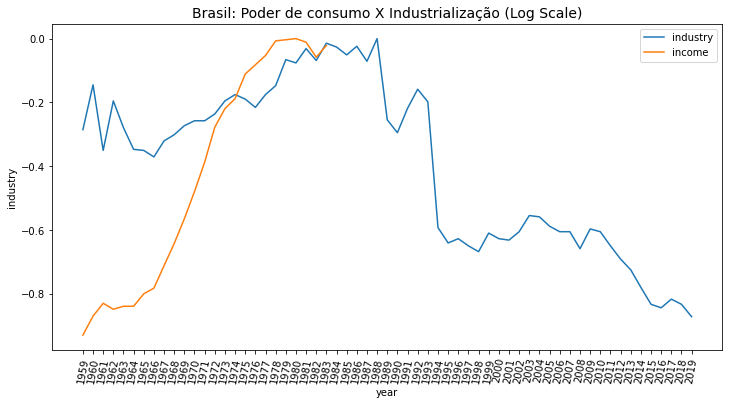

In [43]:
import numpy as np 
plt.figure(figsize=(12,6))

sns.lineplot(x=BR.year, y=np.log( BR.industry ), label='industry')
sns.lineplot(x=BR.year, y=np.log( BR.income ), label='income')

plt.title('Brasil: Poder de consumo X Industrialização (Log Scale)', fontsize=14)
plt.legend()
plt.xticks(rotation=80)
plt.show()

# World Inequality Database

Vamos ver como combinar dados de outras fontes? 

O World Inequality Database é uma base de dados aberta que mantem informações sobre desigualdade e concentração de renda no mundo. Esses dados são a base do livro **Capital in the Twenty-First Century** de *Thomas Piketty*.

In [44]:
from IPython.display import IFrame
IFrame('https://wid.world/data/', width='1000', height=400)

Se você for empregar essa base escolha os índices de interesse, a estrutura da tabela e dê preferência para o formato `.xlsx` para download.

# Preparação dos Dados

Vamos selecionar dados do Brasil de 2000-2019 sobre a renda per capta (gpd) e o percentual da renda concentrado nos 10% mais ricos da população (percentil 10), e combinar esses dados com as informações que já coletamos do gapminder.

In [45]:
gpd_BR = pd.read_excel('https://github.com/rodglins/Python/raw/master/desafios/exploracaoDados/WID_Data_03102021-152112.xls',header=None)
gpd_BR


,0,1,2,3,4
0,Brazil,sptinc_p99p100_z_BR\nPre-tax national income \...,p99p100,1980,0.2521
1,Brazil,sptinc_p99p100_z_BR\nPre-tax national income \...,p99p100,1981,0.2521
2,Brazil,sptinc_p99p100_z_BR\nPre-tax national income \...,p99p100,1982,0.2521
3,Brazil,sptinc_p99p100_z_BR\nPre-tax national income \...,p99p100,1983,0.2521
4,Brazil,sptinc_p99p100_z_BR\nPre-tax national income \...,p99p100,1984,0.2521
...,...,...,...,...,...
75,Brazil,sptinc_p0p50_z_BR\nPre-tax national income \nB...,p0p50,2015,0.1062
76,Brazil,sptinc_p0p50_z_BR\nPre-tax national income \nB...,p0p50,2016,0.0991
77,Brazil,sptinc_p0p50_z_BR\nPre-tax national income \nB...,p0p50,2017,0.0991
78,Brazil,sptinc_p0p50_z_BR\nPre-tax national income \nB...,p0p50,2018,0.1015


In [46]:
gpd_BR.columns = ['country', 'ind_description',  'ind_code', 'year', 'value']
gpd_BR.year = gpd_BR.year.astype(str)
display(gpd_BR)
display(gpd_BR.dtypes)
        

,country,ind_description,ind_code,year,value
0,Brazil,sptinc_p99p100_z_BR\nPre-tax national income \...,p99p100,1980,0.2521
1,Brazil,sptinc_p99p100_z_BR\nPre-tax national income \...,p99p100,1981,0.2521
2,Brazil,sptinc_p99p100_z_BR\nPre-tax national income \...,p99p100,1982,0.2521
3,Brazil,sptinc_p99p100_z_BR\nPre-tax national income \...,p99p100,1983,0.2521
4,Brazil,sptinc_p99p100_z_BR\nPre-tax national income \...,p99p100,1984,0.2521
...,...,...,...,...,...
75,Brazil,sptinc_p0p50_z_BR\nPre-tax national income \nB...,p0p50,2015,0.1062
76,Brazil,sptinc_p0p50_z_BR\nPre-tax national income \nB...,p0p50,2016,0.0991
77,Brazil,sptinc_p0p50_z_BR\nPre-tax national income \nB...,p0p50,2017,0.0991
78,Brazil,sptinc_p0p50_z_BR\nPre-tax national income \nB...,p0p50,2018,0.1015


country             object
ind_description     object
ind_code            object
year                object
value              float64
dtype: object

In [47]:
gpd_BR_all = gpd_BR[ gpd_BR.ind_code == 'p99p100' ][['country', 'year', 'value']]
gpd_BR_perc = gpd_BR[ gpd_BR.ind_code == 'p0p50' ][['country', 'year', 'value']]

display(gpd_BR_all)
display(gpd_BR_perc)

,country,year,value
0,Brazil,1980,0.2521
1,Brazil,1981,0.2521
2,Brazil,1982,0.2521
3,Brazil,1983,0.2521
4,Brazil,1984,0.2521
5,Brazil,1985,0.2521
6,Brazil,1986,0.2521
7,Brazil,1987,0.2521
8,Brazil,1988,0.2521
9,Brazil,1989,0.2521


,country,year,value
40,Brazil,1980,0.1086
41,Brazil,1981,0.1086
42,Brazil,1982,0.1086
43,Brazil,1983,0.1086
44,Brazil,1984,0.1086
45,Brazil,1985,0.1086
46,Brazil,1986,0.1086
47,Brazil,1987,0.1086
48,Brazil,1988,0.1086
49,Brazil,1989,0.1086


In [48]:
BR = pd.merge(BR,gpd_BR_all,on=['country','year'])
BR = BR.rename(columns={'value':'gpd_perc1'})
BR.head()

,country,year,income,industry,gpd_perc1
0,Brazil,1980,1.000000,0.926714,0.2521
1,Brazil,1981,0.988889,0.969267,0.2521
2,Brazil,1982,0.943434,0.933806,0.2521
3,Brazil,1983,0.978788,0.985816,0.2521
4,Brazil,1984,NaN,0.973995,0.2521


In [49]:
BR = pd.merge(BR,gpd_BR_perc,on=['country','year'])
BR = BR.rename(columns={'value':'gpd_perc50'})
BR.head()

,country,year,income,industry,gpd_perc1,gpd_perc50
0,Brazil,1980,1.000000,0.926714,0.2521,0.1086
1,Brazil,1981,0.988889,0.969267,0.2521,0.1086
2,Brazil,1982,0.943434,0.933806,0.2521,0.1086
3,Brazil,1983,0.978788,0.985816,0.2521,0.1086
4,Brazil,1984,NaN,0.973995,0.2521,0.1086


# Visualização e Análise dos Dados

Como queremos comparar dados em escalas muito diferentes uma sugestão é empregarmos dados normalizados.

In [50]:
for c in BR[['income','industry','gpd_perc1','gpd_perc50']]:
  BR[c] = BR[c] / BR[c].max()
BR.head()

,country,year,income,industry,gpd_perc1,gpd_perc50
0,Brazil,1980,1.000000,0.926714,0.843708,0.885808
1,Brazil,1981,0.988889,0.969267,0.843708,0.885808
2,Brazil,1982,0.943434,0.933806,0.843708,0.885808
3,Brazil,1983,0.978788,0.985816,0.843708,0.885808
4,Brazil,1984,NaN,0.973995,0.843708,0.885808


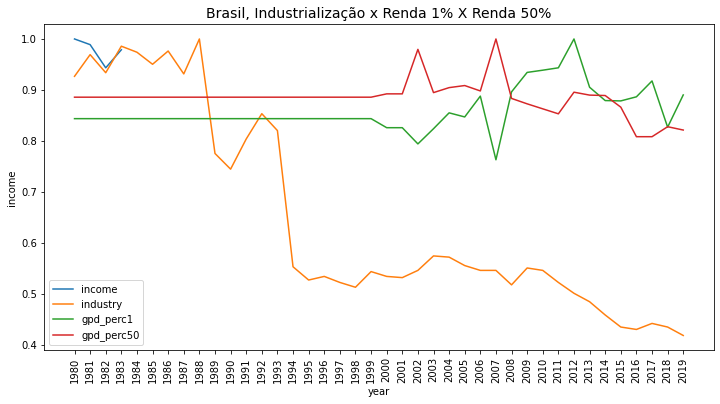

In [51]:
plt.figure(figsize=(12,6))

for c in BR[['income','industry','gpd_perc1','gpd_perc50']]:
  sns.lineplot(x=BR.year, y=BR[c], label=c)

plt.title('Brasil, Industrialização x Renda 1% X Renda 50%', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Conclusões

> *Os dados acima mostram que a concentração de renda vem crescendo no Brasil. Houve crescimento na renda de um 1% da população enquanto nos outros 50% houve queda. É possível observar a desaceleração do processo industrial no Brasil.*